# E-Commerce Sales: Customer Segmentation Analysis using Clustering

## Introduction

In this project, I will be running unsupervised machine learning algorithms on an e-commerce dataset found on kaggle. The dataset includes sales data of customers from around 2012 to 2014. Although the dataset included metric definitions, there are still some background context missing that will affect how I analyze the dataset.

For this project scenario, I am a data analyst for an e-commerce firm and will be implementing ML algorithms to see if we can segment our customers based on certain data points (Income, Education, Marital Status, and etc.) to better target customers with marketing or promotions. The goal is to figure out if there are marketing strategies to increase the total spend of a customer.

Because I am segmenting customers based on certain datapoints, I know I will be using clustering algorithms such as K-means or Principal Component Analysis.

Lastly, this project's main purpose is implementing ML for a business use-case. There could be a lot more data exploration and analysis done for this specific dataset.

## Importing and Loading Data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Importing Data
df = pd.read_csv('/Users/anthonycheung/Downloads/marketing_campaign.csv', sep='\t')

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Data Cleaning and Exploration
Before I perform any data analysis, I will try to explore the dataset to understand it better. I will also see if I need to make any amendments to certain columns.

In [4]:
# Information on Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

__Data Observations__
1. There are missing values in the "Income" column
2. Dt_Customer is not parsed as DateTime. This column indidcates the date that a customer was registered in the database
3. There are categorical features in the dataframe that will need to be label encoded

In [5]:
# Remove NA values
df = df.dropna()
df.shape

(2216, 29)

In [6]:
# Check for Duplicates 
df.drop('ID', axis=1, inplace=True)

In [7]:
# Through this, I am able to determine that there are customers with duplicate info in the dataset
df[df.duplicated(keep=False)].sort_values(by='Income')

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
30          1989      Master       Divorced  10979.0        0         0   
1138        1989      Master       Divorced  10979.0        0         0   
1203        1979  Graduation       Divorced  15287.0        1         0   
260         1979  Graduation       Divorced  15287.0        1         0   
558         1970    2n Cycle        Married  15315.0        0         0   
...          ...         ...            ...      ...      ...       ...   
824         1959  Graduation       Together  87771.0        0         1   
1301        1953  Graduation       Together  94384.0        0         0   
943         1953  Graduation       Together  94384.0        0         0   
650         1960      Master         Single  98777.0        0         0   
1113        1960      Master         Single  98777.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
30    22-05-2014       34         8          4  ...                  5   
1138  22-05-2014       34         8          4  ...                  5   
1203  10-10-2012       60         1          2  ...                  7   
260   10-10-2012       60         1          2  ...                  7   
558   03-08-2013       27         7          4  ...                  5   
...          ...      ...       ...        ...  ...                ...   
824   22-05-2013       61      1492         38  ...                  6   
1301  04-03-2013       62      1111         24  ...                  2   
943   04-03-2013       62      1111         24  ...                  2   
650   17-02-2014       23      1000         19  ...                  1   
1113  17-02-2014       23      1000         19  ...                  1   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
30               0             0             0             0             0   
1138             0             0             0             0             0   
1203             1             0             0             0             0   
260              1             0             0             0             0   
558              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
824              0             1             1             1             1   
1301             0             1             1             1             0   
943              0             1             1             1             0   
650              0             1             0             0             0   
1113             0             1             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
30           0              3         11         0  
1138         0              3         11         0  
1203         0              3         11         1  
260          0              3         11         1  
558          0              3         11         0  
...        ...            ...        ...       ...  
824          0              3         11         1  
1301         0              3         11         1  
943          0              3         11         1  
650          0              3         11         0  
1113         0              3         11         0  

[358 rows x 28 columns]

In [8]:
df[df.duplicated(keep='first')]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
83          1963      Master       Together  38620.0        0         0   
179         1951    2n Cycle        Married  78497.0        0         0   
281         1976  Graduation       Together  51369.0        0         1   
282         1946  Graduation       Together  37760.0        0         0   
363         1978         PhD        Married  37717.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
83    11-05-2013       56       112         17  ...                  3   
179   01-12-2013       44       207         26  ...                  2   
281   25-10-2012       84       297          7  ...                  8   
282   31-08-2012       20        84          5  ...                  7   
363   23-11-2012       31         9          0  ...                  9   
...          ...      ...       ...        ...  ...                ...   
2218  19-06-2013       40         5          1  ...                  8   
2221  04-07-2013       12       712         26  ...                  1   
2225  26-09-2012       55       368         24  ...                  7   
2234  01-07-2013       81         3          3  ...                  7   
2236  10-06-2014       56       406          0  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
83               0             0             0             0             0   
179              0             0             0             1             0   
281              0             0             0             0             0   
282              0             0             0             0             0   
363              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2218             0             0             0             0             0   
2221             0             1             1             0             0   
2225             0             0             0             0             0   
2234             0             0             0             0             0   
2236             0             0             0             1             0   

      Complain  Z_CostContact  Z_Revenue  Response  
83           0              3         11         0  
179          0              3         11         0  
281          0              3         11         0  
282          0              3         11         0  
363          0              3         11         0  
...        ...            ...        ...       ...  
2218         0              3         11         0  
2221         0              3         11         1  
2225         0              3         11         0  
2234         0              3         11         0  
2236         0              3         11         0  

[182 rows x 28 columns]

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2034, 28)

In [11]:
# Change date columns from object to datetime data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(max(df['Dt_Customer']))
print(min(df['Dt_Customer']))

2014-12-06 00:00:00
2012-01-08 00:00:00


In [12]:
# Dataset does not tell us what date the dataset was extracted. 
# So I am just checking roughly to see a reasonable date that the dataset could be downloaded on.
# Looking at Dt_Customer and Recency allows me to understand when the dataset was pulled
df[df['Dt_Customer'] > '2014-12-01']

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
50          1957  Graduation          Widow  65486.0        0         1   
88          1973  Graduation        Married  79593.0        0         0   
153         1988  Graduation          Alone  34176.0        1         0   
216         1978    2n Cycle         Single  52195.0        2         1   
288         1966  Graduation          Widow  79946.0        0         0   
701         1978  Graduation        Married  71427.0        2         0   
815         1970         PhD       Together  65968.0        0         1   
816         1976  Graduation        Married  30772.0        1         1   
842         1988  Graduation         Single  34176.0        1         0   
1094        1965         PhD        Married  57236.0        1         1   
1257        1975  Graduation        Married  74190.0        0         1   
1294        1963         PhD         Single  48918.0        1         1   
1458        1970  Graduation         Single  93790.0        0         0   
1733        1966  Graduation       Together  82427.0        0         0   
1952        1951  Graduation         Single  80872.0        0         0   
1982        1951  Graduation        Married  94642.0        0         0   
2003        1966  Graduation         Single  33279.0        0         0   
2020        1978  Graduation       Together  28587.0        1         0   
2155        1983    2n Cycle        Married  32146.0        1         0   
2158        1955         PhD        Married  58482.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
50    2014-12-05       29       245         19  ...                  2   
88    2014-12-05       70       350         60  ...                  2   
153   2014-12-05       12         5          7  ...                  6   
216   2014-12-05        2        12          0  ...                  8   
288   2014-12-05       19       395        183  ...                  3   
701   2014-12-03       26       212        123  ...                  4   
815   2014-12-05       12       376          9  ...                  3   
816   2014-12-03       89         7          2  ...                  6   
842   2014-12-05       12         5          7  ...                  6   
1094  2014-12-03       22       105          0  ...                  3   
1257  2014-12-05       49       151         81  ...                  2   
1294  2014-12-04       21        52          0  ...                  4   
1458  2014-12-02       16      1302         68  ...                  2   
1733  2014-12-03       35       482        147  ...                  1   
1952  2014-12-05       60       483         72  ...                  1   
1982  2014-12-02       35       879        143  ...                  1   
2003  2014-12-06       29        10          3  ...                  3   
2020  2014-12-02       42        22          4  ...                  6   
2155  2014-12-05       16        26          3  ...                  6   
2158  2014-12-03       59       576          7  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
50               0             0             0             0             0   
88               0             0             1             0             0   
153              0             0             0             0             0   
216              0             0             0             0             0   
288              0             0             0             0             0   
701              0             0             0             0             0   
815              0             0             0             0             0   
816              0             0             0             0             0   
842              0             0             0             0             0   
1094             0             0             0             0             0   
1257             

In [13]:
# Create a feature for "Customer Tenure"
# This will help us understand how long a customer has been purchasing from our company
df['Customer_Tenure_Days'] = (max(df['Dt_Customer']) + pd.Timedelta(days=80)) - df['Dt_Customer']
df['Customer_Tenure_Days'] = df['Customer_Tenure_Days'].dt.days
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-04-09       58       635         88  ...             0             0   
1  2014-08-03       38        11          1  ...             0             0   
2  2013-08-21       26       426         49  ...             0             0   
3  2014-10-02       26        11          4  ...             0             0   
4  2014-01-19       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Customer_Tenure_Days  
0         11         1                  1051  
1         11         0                   205  
2         11         0                   552  
3         11         0                   145  
4         11         0                   401  

[5 rows x 29 columns]

## More Cleaning and Exploring - For Categorical Columns/Features

In [14]:
# Marital Status variables will be renamed.
df['Marital_Status'].value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [15]:
# Educationa variables will be renamed into Undergraduate, Post Graduate, and Doctorate
# 2n Cycle refers to Master's Degree
df['Education'].value_counts()

Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: Education, dtype: int64

In [16]:
# More Feature Engineering

## Age of customer today (assuming data is from around early 2015)
df['Age'] = 2015 - df['Year_Birth']

## Total Spend on all Items
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

## Fixing some variables in marital status
df['Living_With'] = df['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Absurd': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone', 'Divorced': 'Alone', 'Single' : 'Alone',})

## Consolidate Deal, Web, Catalogue, and Store Purchases 
df['Total_Purchases'] = df['NumDealsPurchases'] +  df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

## Include total children living in household
df['Children'] = df['Kidhome'] + df['Teenhome']

## Include total family size
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']

## Indicate whether person is a parent
df['Is_Parent'] = np.where(df.Children >0, 1, 0)

## Segmenting education levels
df['Education'] = df['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Postgraduate', 'Graduation': 'Undergraduate',
                                          'Master': 'Postgraduate', 'PhD': 'Doctorate'})

## Renaming some columns
df = df.rename(columns={'MntWines': 'Wines_Spent', 'MntFruits' : 'Fruits_Spent', 'MntMeatProducts' : 'Meats_Spent',
                       'MntFishProducts': 'Fish_Spent', 'MntSweetProducts': 'Sweets_Spent', 'MntGoldProds' : 'Gold_Spent'})

## Dropping redundant features
drop_columns = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
df = df.drop(drop_columns, axis =1)

In [17]:
df['Education'].value_counts()

Undergraduate    1068
Postgraduate      521
Doctorate         445
Name: Education, dtype: int64

In [18]:
# Look at updated dataframe
df

Education    Income  Kidhome  Teenhome  Recency  Wines_Spent  \
0     Undergraduate   58138.0        0         0       58          635   
1     Undergraduate   46344.0        1         1       38           11   
2     Undergraduate   71613.0        0         0       26          426   
3     Undergraduate   26646.0        1         0       26           11   
4         Doctorate   58293.0        1         0       94          173   
...             ...       ...      ...       ...      ...          ...   
2233  Undergraduate  666666.0        1         0       23            9   
2235  Undergraduate   61223.0        0         1       46          709   
2237  Undergraduate   56981.0        0         0       91          908   
2238   Postgraduate   69245.0        0         1        8          428   
2239      Doctorate   52869.0        1         1       40           84   

      Fruits_Spent  Meats_Spent  Fish_Spent  Sweets_Spent  ...  Complain  \
0               88          546         172            88  ...         0   
1                1            6           2             1  ...         0   
2               49          127         111            21  ...         0   
3                4           20          10             3  ...         0   
4               43          118          46            27  ...         0   
...            ...          ...         ...           ...  ...       ...   
2233            14           18           8             1  ...         0   
2235            43          182          42           118  ...         0   
2237            48          217          32            12  ...         0   
2238            30          214          80            30  ...         0   
2239             3           61           2             1  ...         0   

      Response  Customer_Tenure_Days  Age  Total_Spent  Living_With  \
0            1                  1051   58         1617        Alone   
1            0                   205   61           27        Alone   
2            0                   552   50          776      Partner   
3            0                   145   31           53      Partner   
4            0                   401   34          422      Partner   
...        ...                   ...  ...          ...          ...   
2233         0                   748   38           62      Partner   
2235         0                   621   48         1341      Partner   
2237         0                   395   34         1241        Alone   
2238         0                   396   59          843      Partner   
2239         1                   862   61          172      Partner   

      Total_Purchases  Children  Family_Size  Is_Parent  
0                  25         0            1          0  
1                   6         2            3          1  
2                  21         0            2          0  
3                   8         1            3          1  
4                  19         1            3          1  
...               ...       ...          ...        ...  
2233               11         1            3          1  
2235               18         1            3          1  
2237               19         0            1          0  
2238               23         1            3          1  
2239               11         2            4          1  

[2034 rows x 31 columns]

In [19]:
# Looking at the below table, you can see there are outliers for Income and Age
df.describe()

Income      Kidhome     Teenhome      Recency  Wines_Spent  \
count    2034.000000  2034.000000  2034.000000  2034.000000  2034.000000   
mean    52357.791544     0.442970     0.508358    48.844641   305.180924   
std     25526.956988     0.535914     0.546130    28.983678   337.323274   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35528.250000     0.000000     0.000000    24.000000    23.000000   
50%     51533.000000     0.000000     0.000000    49.000000   175.500000   
75%     68480.750000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

       Fruits_Spent  Meats_Spent   Fish_Spent  Sweets_Spent   Gold_Spent  ...  \
count   2034.000000  2034.000000  2034.000000   2034.000000  2034.000000  ...   
mean      26.292527   167.763520    37.449361     27.141101    43.809735  ...   
std       39.772885   226.790697    54.792015     41.494430    51.741969  ...   
min        0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%        2.000000    16.000000     3.000000      1.000000     9.000000  ...   
50%        8.000000    68.000000    12.000000      8.000000    24.000000  ...   
75%       33.000000   230.000000    50.000000     33.750000    56.000000  ...   
max      199.000000  1725.000000   259.000000    262.000000   321.000000  ...   

       AcceptedCmp2     Complain     Response  Customer_Tenure_Days  \
count   2034.000000  2034.000000  2034.000000           2034.000000   
mean       0.012783     0.009833     0.153392            591.115044   
std        0.112363     0.098696     0.360454            232.779299   
min        0.000000     0.000000     0.000000             80.000000   
25%        0.000000     0.000000     0.000000            417.000000   
50%        0.000000     0.000000     0.000000            591.000000   
75%        0.000000     0.000000     0.000000            764.750000   
max        1.000000     1.000000     1.000000           1143.000000   

               Age  Total_Spent  Total_Purchases     Children  Family_Size  \
count  2034.000000  2034.000000      2034.000000  2034.000000  2034.000000   
mean     46.197148   607.637168        14.889872     0.951327     2.591445   
std      11.975420   603.552763         7.656462     0.745599     0.905112   
min      19.000000     5.000000         0.000000     0.000000     1.000000   
25%      38.000000    69.000000         8.000000     0.000000     2.000000   
50%      45.000000   397.000000        15.000000     1.000000     3.000000   
75%      56.000000  1048.000000        21.000000     1.000000     3.000000   
max     122.000000  2525.000000        44.000000     3.000000     5.000000   

         Is_Parent  
count  2034.000000  
mean      0.718781  
std       0.449705  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 29 columns]

## EDA

<Figure size 1440x1152 with 0 Axes>

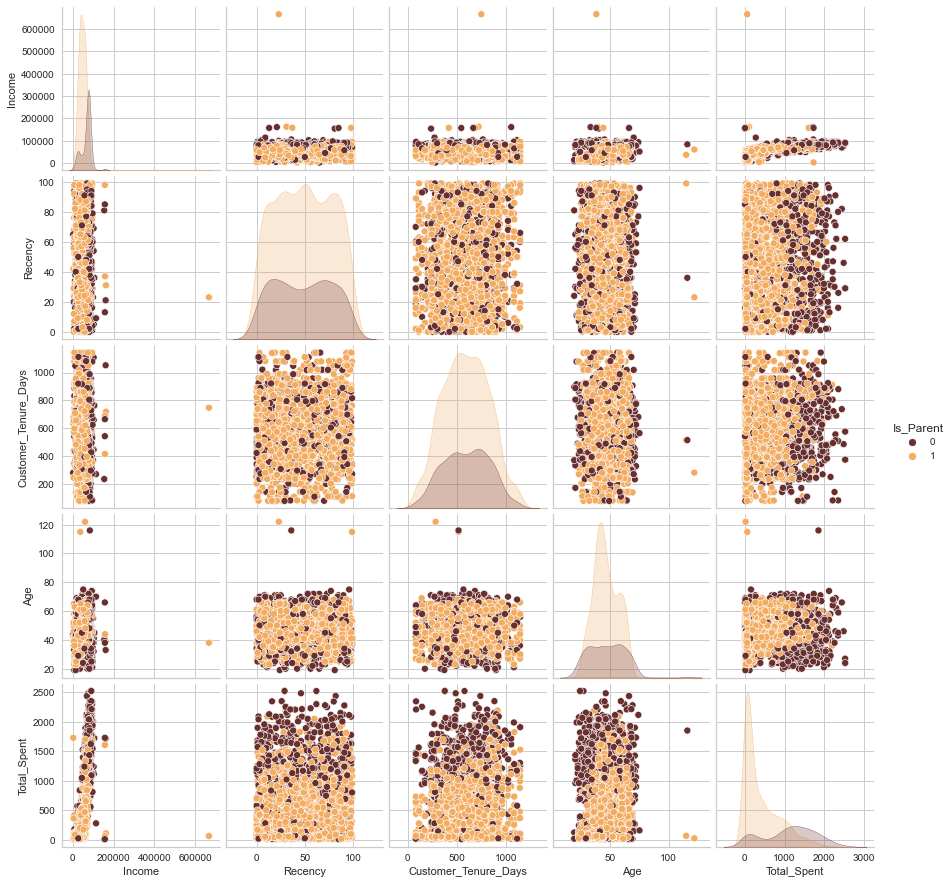

In [20]:
# Plotting some of the data columns
columns = ['Income', 'Recency', 'Customer_Tenure_Days', 'Age', 'Total_Spent', 'Is_Parent']
plt.figure(figsize=(20,16))
sns.pairplot(df[columns], hue= 'Is_Parent', palette=(['#682F2F', '#F3AB60']))
plt.show()

## Removing Outliers

In [21]:
# Removing outlier data based on age and income
df = df[(df['Age']<100)]
df = df[(df['Income']<600000)]
df.shape

(2030, 31)

<AxesSubplot:>

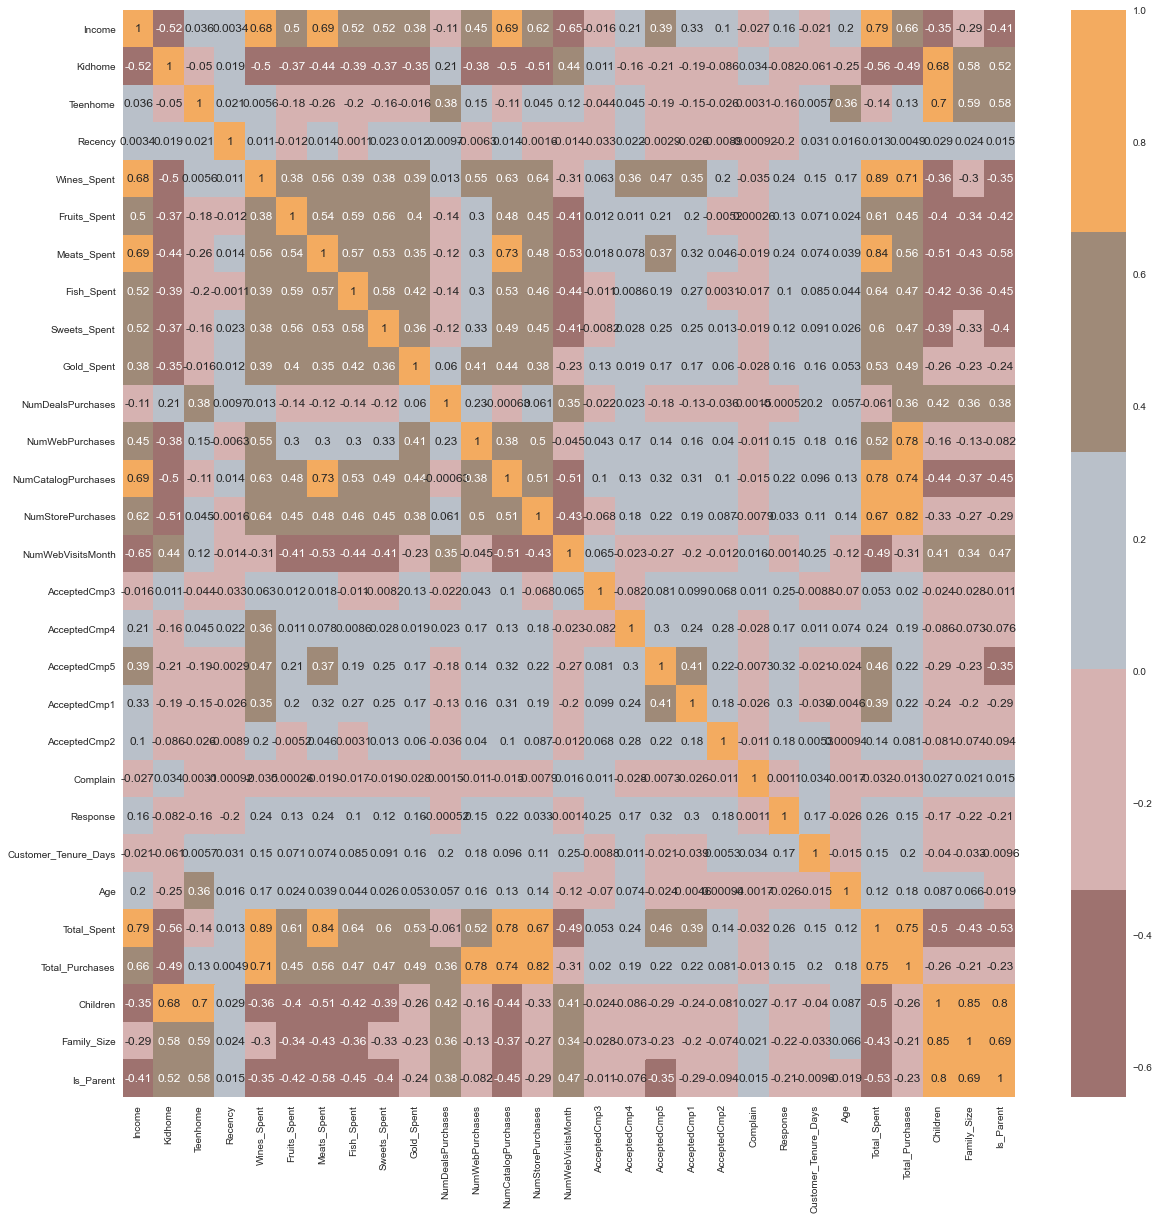

In [22]:
# Correlation Matrix
corr = df.corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap= cmap, center= 0)

## Data Preprocessing
1. Label Encode the Categorical features
2. Scaling the features using standard scaler
3. Create a subset dataframe for dimensionality reduction (PCA Analysis)

In [23]:
# Get list of categorical columns
cat_cols = df.select_dtypes(include=['category', 'object']).columns
print(cat_cols)

Index(['Education', 'Living_With'], dtype='object')


In [24]:
# Label Encode the Categorical features
le = LabelEncoder()
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [25]:
df

Education   Income  Kidhome  Teenhome  Recency  Wines_Spent  \
0             2  58138.0        0         0       58          635   
1             2  46344.0        1         1       38           11   
2             2  71613.0        0         0       26          426   
3             2  26646.0        1         0       26           11   
4             0  58293.0        1         0       94          173   
...         ...      ...      ...       ...      ...          ...   
2232          2  26816.0        0         0       50            5   
2235          2  61223.0        0         1       46          709   
2237          2  56981.0        0         0       91          908   
2238          1  69245.0        0         1        8          428   
2239          0  52869.0        1         1       40           84   

      Fruits_Spent  Meats_Spent  Fish_Spent  Sweets_Spent  ...  Complain  \
0               88          546         172            88  ...         0   
1                1            6           2             1  ...         0   
2               49          127         111            21  ...         0   
3                4           20          10             3  ...         0   
4               43          118          46            27  ...         0   
...            ...          ...         ...           ...  ...       ...   
2232             1            6           3             4  ...         0   
2235            43          182          42           118  ...         0   
2237            48          217          32            12  ...         0   
2238            30          214          80            30  ...         0   
2239             3           61           2             1  ...         0   

      Response  Customer_Tenure_Days  Age  Total_Spent  Living_With  \
0            1                  1051   58         1617            0   
1            0                   205   61           27            0   
2            0                   552   50          776            1   
3            0                   145   31           53            1   
4            0                   401   34          422            1   
...        ...                   ...  ...          ...          ...   
2232         0                   921   29           22            0   
2235         0                   621   48         1341            1   
2237         0                   395   34         1241            0   
2238         0                   396   59          843            1   
2239         1                   862   61          172            1   

      Total_Purchases  Children  Family_Size  Is_Parent  
0                  25         0            1          0  
1                   6         2            3          1  
2                  21         0            2          0  
3                   8         1            3          1  
4                  19         1            3          1  
...               ...       ...          ...        ...  
2232                4         0            1          0  
2235               18         1            3          1  
2237               19         0            1          0  
2238               23         1            3          1  
2239               11         2            4          1  

[2030 rows x 31 columns]

In [26]:
df['Education'].value_counts()

2    1067
1     519
0     444
Name: Education, dtype: int64

In [27]:
# Create Copy of Data Frame
dfcopy = df.copy()

# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dfcopy = dfcopy.drop(cols_del, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(dfcopy)
scaled_df = pd.DataFrame(scaler.transform(dfcopy),columns= dfcopy.columns )

In [28]:
# Scaled data to be used for PCA
scaled_df.head()

Education    Income   Kidhome  Teenhome   Recency  Wines_Spent  \
0   0.859590  0.282325 -0.826467 -0.931864  0.315774     0.977377   
1   0.859590 -0.264045  1.039748  0.899388 -0.374572    -0.872967   
2   0.859590  0.906568 -0.826467 -0.931864 -0.788780     0.357631   
3   0.859590 -1.176576  1.039748 -0.931864 -0.788780    -0.872967   
4  -1.620819  0.289505  1.039748 -0.931864  1.558398    -0.392589   

   Fruits_Spent  Meats_Spent  Fish_Spent  Sweets_Spent  ...  \
0      1.554736     1.668212    2.455074      1.465819  ...   
1     -0.636223    -0.713700   -0.647096     -0.630293  ...   
2      0.572582    -0.179975    1.341942     -0.148429  ...   
3     -0.560673    -0.651947   -0.501111     -0.582107  ...   
4      0.421481    -0.219674    0.155819     -0.003869  ...   

   NumStorePurchases  NumWebVisitsMonth  Customer_Tenure_Days       Age  \
0          -0.552207           0.686891              1.974704  1.020735   
1          -1.169828          -0.133338             -1.659116  1.277967   
2           1.300654          -0.543452             -0.168649  0.334782   
3          -0.552207           0.276777             -1.916834 -1.294356   
4           0.065413          -0.133338             -0.817238 -1.037123   

   Total_Spent  Living_With  Total_Purchases  Children  Family_Size  Is_Parent  
0     1.673597    -1.334474         1.319160 -1.276029    -1.758373  -1.598489  
1    -0.963290    -1.334474        -1.162791  1.405481     0.450474   0.625591  
2     0.278866     0.749359         0.796644 -1.276029    -0.653949  -1.598489  
3    -0.920171     0.749359        -0.901533  0.064726     0.450474   0.625591  
4    -0.308214     0.749359         0.535386  0.064726     0.450474   0.625591  

[5 rows x 24 columns]

## PCA - Dimensionality Reduction

In this dataset, there are ~24 features (data points) that will assist in the clustering algorithm. However, because there are so many features, and many of these features are correlated, I will perform a dimensionalty reduction before putting the dataset through a classifier like K-means.

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance as possible in high-dimensional data. It transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data.

In [30]:
# Determining how many dimensions to reduce to
pca = PCA()
pca.fit(scaled_df)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print(explained_variance)
print(cumulative_variance)

[3.66491826e-01 1.32354258e-01 6.52677900e-02 5.89532706e-02
 4.72680997e-02 4.19477726e-02 4.07811772e-02 3.38578096e-02
 2.93241491e-02 2.63863421e-02 2.61502779e-02 2.34858753e-02
 1.91059599e-02 1.82542294e-02 1.64116049e-02 1.54233809e-02
 1.22389414e-02 1.02031793e-02 8.61231444e-03 7.48174177e-03
 5.98603115e-32 7.14381863e-33 2.87685846e-33 9.06921489e-34]
[0.36649183 0.49884608 0.56411387 0.62306714 0.67033524 0.71228302
 0.75306419 0.786922   0.81624615 0.84263249 0.86878277 0.89226865
 0.91137461 0.92962884 0.94604044 0.96146382 0.97370276 0.98390594
 0.99251826 1.         1.         1.         1.         1.        ]


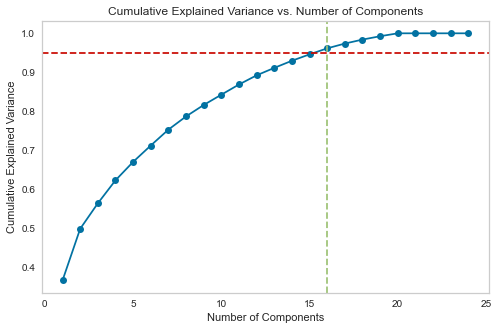

In [31]:
# Graph to determine how many dimensions to reduce to (>95% variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold
plt.axvline(x=16, color='g', linestyle='--')  # 16 components will explain >95% variance
plt.grid()
plt.show()

In [32]:
# Initiating PCA to reduce dimensions features to 16
pca = PCA(n_components=16)
pca.fit(scaled_df)

PCA_df = pd.DataFrame(pca.transform(scaled_df))
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
0   2030.0  1.533530e-16  2.966503 -5.559274 -2.696932 -0.702141  2.550700   
1   2030.0 -9.188053e-18  1.782714 -4.297387 -1.387257 -0.212552  1.265197   
2   2030.0  2.269668e-17  1.251878 -4.016232 -0.826122 -0.024655  0.816113   
3   2030.0 -4.770404e-17  1.189780 -3.575028 -0.897372 -0.014239  0.759488   
4   2030.0  2.953303e-18  1.065361 -3.252509 -0.699535  0.024030  0.724000   
5   2030.0  4.044384e-17  1.003615 -2.142722 -0.869761  0.013165  0.870852   
6   2030.0  2.477493e-17  0.989561 -3.467803 -0.646361  0.001529  0.658876   
7   2030.0  2.647034e-17  0.901658 -2.922307 -0.589432  0.005073  0.579802   
8   2030.0  1.214136e-17  0.839122 -3.984339 -0.484868  0.033386  0.462573   
9   2030.0 -1.755574e-17  0.795980 -2.260928 -0.500489 -0.041731  0.451785   
10  2030.0  3.375789e-17  0.792412 -3.560363 -0.408146 -0.008405  0.478114   
11  2030.0 -8.613799e-18  0.750959 -2.595847 -0.456227  0.002118  0.458278   
12  2030.0 -3.992428e-17  0.677325 -2.490693 -0.340498 -0.019334  0.344618   
13  2030.0  1.944258e-17  0.662055 -3.138952 -0.295053  0.016927  0.293108   
14  2030.0 -3.724443e-17  0.627752 -2.954973 -0.209267 -0.008079  0.187188   
15  2030.0 -2.789230e-18  0.608559 -3.742936 -0.259486  0.020777  0.287736   

         max  
0   7.548862  
1   6.413281  
2   6.680963  
3   3.679737  
4   3.708912  
5   2.419931  
6   5.095702  
7   3.636243  
8   9.148358  
9   3.554971  
10  4.125370  
11  5.213539  
12  4.757084  
13  4.349987  
14  3.274967  
15  4.768307

## K-Means Clustering

Now that the attributes have been reduced to 16 dimensions, I will be performing K-means clustering. The goal is to group similar data points together based on their features, while maximizing the distance between different clusters.

To determine the number of optimal clusters, I will be using the Elbow Method as well as looking at the Silhouette Score for confirmation. 

Elbow Method to determine the number of clusters to be formed:


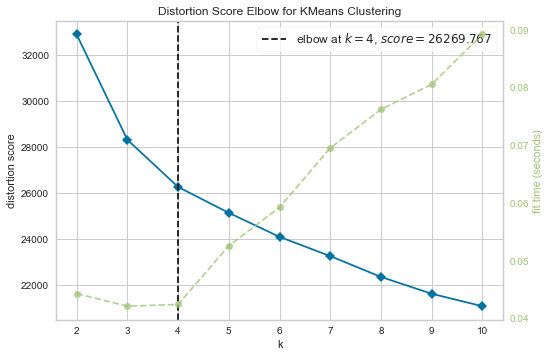

In [43]:
# Elbow Method
# Looking at the below graph, the most optimal number of clusters should be 4
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10, display=False)
Elbow_M.fit(PCA_df)
Elbow_M.show()
plt.show()

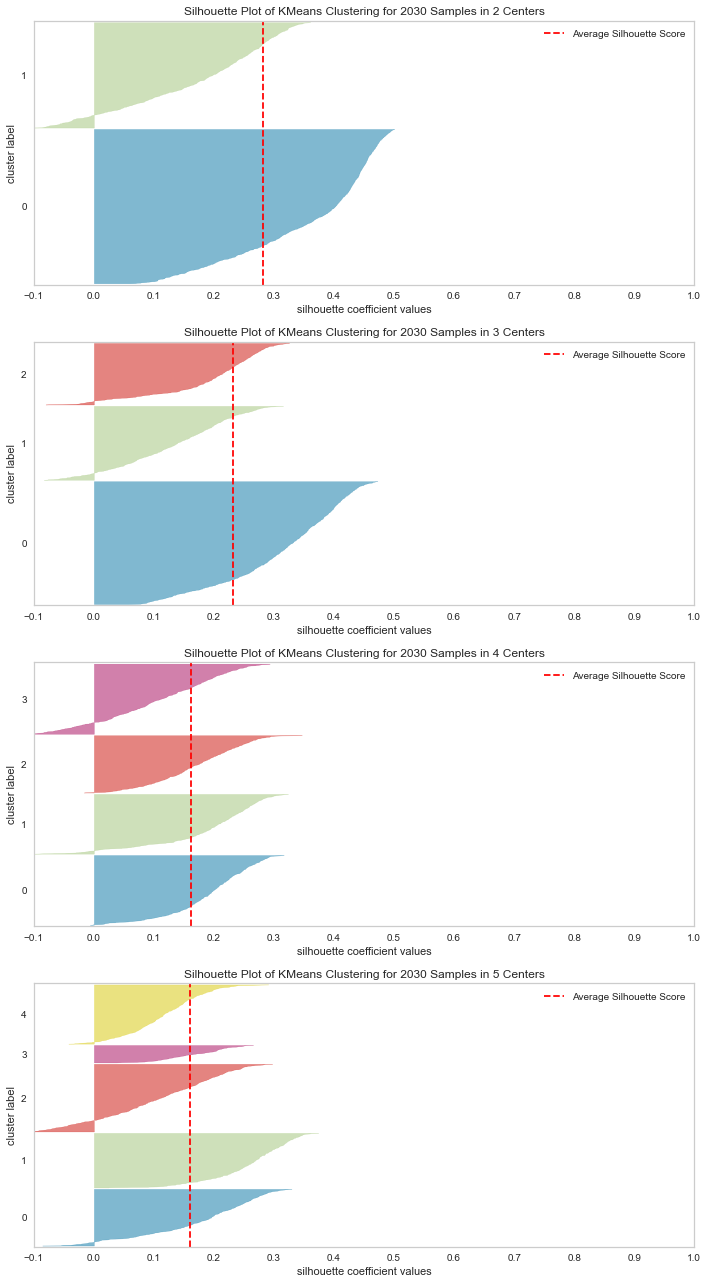

In [46]:
# Checking Silhouette Coefficient to see the most optimal amount of clusters

from yellowbrick.cluster import SilhouetteVisualizer

k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(PCA_df)
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    axes[i-2].grid(False)
    
plt.tight_layout()

Looking at the above Silhouette Plot, 4 clusters seems to be most optimal as well. Although the silhouette coefficient values of 2 and 3 clusters are higher, the distribution of clusters is not as even as the distribution of 4 clusters. 

In [35]:
km = KMeans(n_clusters=4)
y_predicted= km.fit_predict(dfcopy)
dfcopy['Cluster'] = y_predicted
dfcopy['Cluster'] = 'cluster'+ dfcopy['Cluster'].astype('str')
dfcopy.head()

Education   Income  Kidhome  Teenhome  Recency  Wines_Spent  Fruits_Spent  \
0          2  58138.0        0         0       58          635            88   
1          2  46344.0        1         1       38           11             1   
2          2  71613.0        0         0       26          426            49   
3          2  26646.0        1         0       26           11             4   
4          0  58293.0        1         0       94          173            43   

   Meats_Spent  Fish_Spent  Sweets_Spent  ...  NumWebVisitsMonth  \
0          546         172            88  ...                  7   
1            6           2             1  ...                  5   
2          127         111            21  ...                  4   
3           20          10             3  ...                  6   
4          118          46            27  ...                  5   

   Customer_Tenure_Days  Age  Total_Spent  Living_With  Total_Purchases  \
0                  1051   58         1617            0               25   
1                   205   61           27            0                6   
2                   552   50          776            1               21   
3                   145   31           53            1                8   
4                   401   34          422            1               19   

   Children  Family_Size  Is_Parent   Cluster  
0         0            1          0  cluster2  
1         2            3          1  cluster3  
2         0            2          0  cluster2  
3         1            3          1  cluster0  
4         1            3          1  cluster2  

[5 rows x 25 columns]

In [36]:
# Plotting the cluster
import plotly.express as px
import plotly.graph_objects as go
PLOT = go.Figure()
for C in list(dfcopy.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = dfcopy[dfcopy.Cluster == C]['Income'],
                                y = dfcopy[dfcopy.Cluster == C]['Age'],
                                z = dfcopy[dfcopy.Cluster == C]['Total_Spent'],
                                 mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))

PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Total_expense: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Expense', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
PLOT.show()

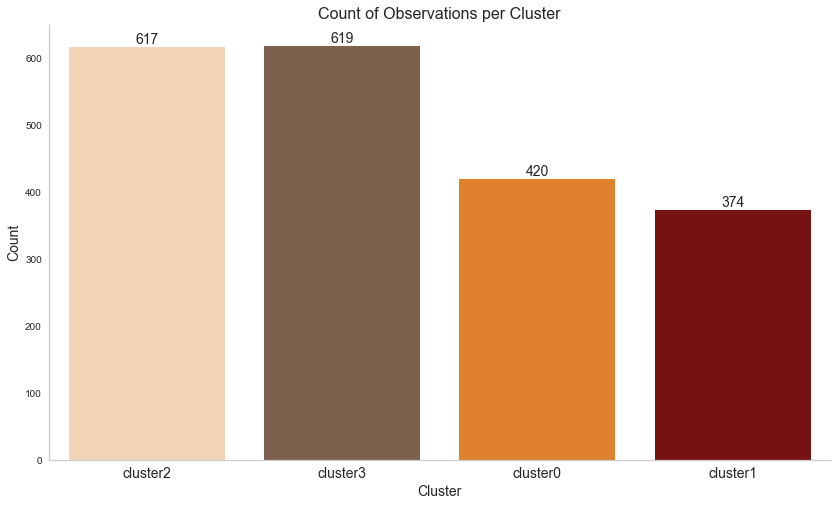

In [37]:
# Create Graph for Cluster Distribution
plt.figure(figsize=(14, 8))
cl = ['#FAD3AE', '#855E46', '#FE800F', '#890000']
ax = sns.countplot(x='Cluster', data=dfcopy, palette=cl)

# Set labels and title
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Observations per Cluster', fontsize=16)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=14)

# Increase bar title size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

# Remove gridlines and spines
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

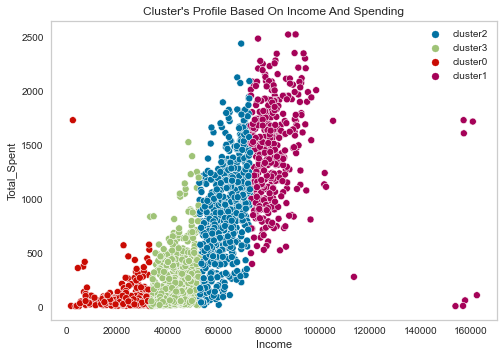

In [38]:
# Scatter Plot Visualization
sns.scatterplot(data = dfcopy,x=dfcopy["Income"], y=dfcopy["Total_Spent"],hue=dfcopy["Cluster"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.grid(False)
plt.show()

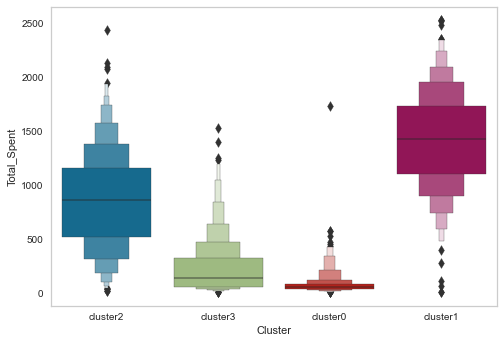

In [39]:
plt.figure()
pl=sns.boxenplot(x=dfcopy["Cluster"], y=dfcopy["Total_Spent"])
plt.grid(False)
plt.show()

## Summary

In [40]:
# Averaging Metrics
result = dfcopy.groupby('Cluster')[['Age', 'Customer_Tenure_Days', 'Total_Spent', 'Income', 'Family_Size', 'Total_Purchases']].mean().reset_index()

# Display the result
result['Avg_Spend'] = result['Total_Spent'] / result['Total_Purchases']

# Include # of Customers per Cluster in the table
count = [617, 420, 374, 619]
count_df = pd.DataFrame(count, columns=['Customer_Count'])
result = pd.concat([result, count_df], axis=1)
result = result[['Cluster', 'Customer_Count', 'Age', 'Customer_Tenure_Days', 'Total_Spent', 'Income', 'Family_Size', 'Total_Purchases', 'Avg_Spend']]


result

Cluster  Customer_Count        Age  Customer_Tenure_Days  Total_Spent  \
0  cluster0             617  40.447619            601.488095    77.485714   
1  cluster1             420  47.037433            571.122995  1420.810160   
2  cluster2             374  49.121556            604.726094   859.272285   
3  cluster3             619  46.342488            583.075929   225.903069   

         Income  Family_Size  Total_Purchases  Avg_Spend  
0  23333.100000     2.640476         7.464286  10.380861  
1  82828.360963     1.946524        20.807487  68.283603  
2  62699.301459     2.583468        20.027553  42.904508  
3  42302.988691     2.957997        11.269790  20.045011

__Summary Table__

In [41]:
cluster_table = result[['Cluster', 'Customer_Count', 'Income', 'Avg_Spend', 'Total_Purchases']]
cluster_table

Cluster  Customer_Count        Income  Avg_Spend  Total_Purchases
0  cluster0             617  23333.100000  10.380861         7.464286
1  cluster1             420  82828.360963  68.283603        20.807487
2  cluster2             374  62699.301459  42.904508        20.027553
3  cluster3             619  42302.988691  20.045011        11.269790

__Conclusion__

K-means clustering algorithm helped divide customers into 4 cluster groups. All clusters have distinct average spend and total purchase amounts.

The table above consolidates sales data of two years, so avg spend and total purchases should be halved when considering a customers one-year spending habit.

__Main Learning__: Customers are grouped mainly based on their average spend. Based on their average spend, different types of business/marketing strategies can be implemented to try to achieve incremental or additional revenue from each customer.

__Cluster 0__: (Second highest avg spend) Reward their frequent purchases with gifts or smaller discounts. For an example, we know customers in this cluster makes around 10 purchases a year. Maybe it would be worth rewarding them with a discount if they make two purchases within a month.

__Cluster 1__: (Lowest avg spend with lowest income) Target this group with big discounts, but goal is to increase their avg spend from ~$10 per two years.


__Cluster 2__: (Highest avg spend). Have similar strategy as cluster 0. For top customers, would it be worth implementing additional rewards or loyalty points to facilitate more spending but also show this cluster that they are highly-valued by our company. 

__Cluster 3__: (Second lowest avg spend). Have a similar strategy as cluster 1.